In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


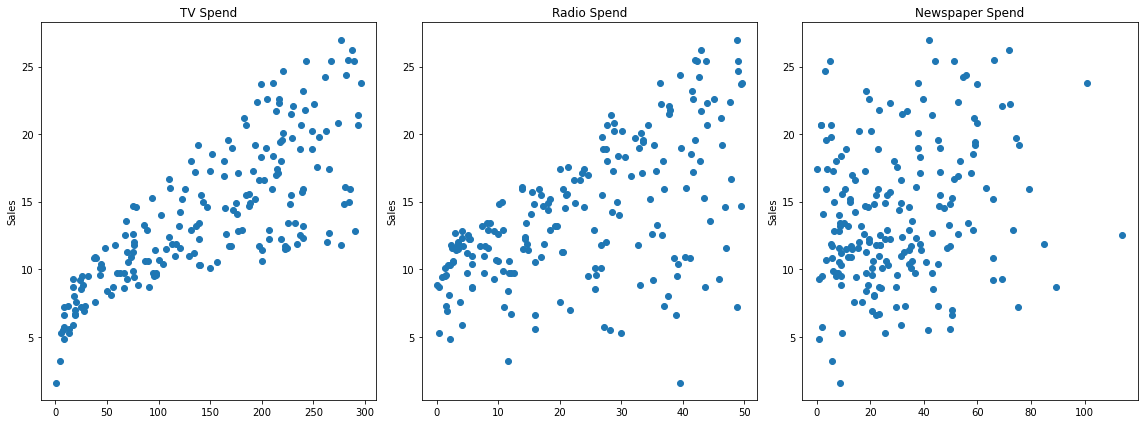

In [4]:
fig,axes = plt.subplots(1,3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel('Sales')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title('Newspaper Spend');
axes[2].set_ylabel('Sales')
plt.tight_layout();

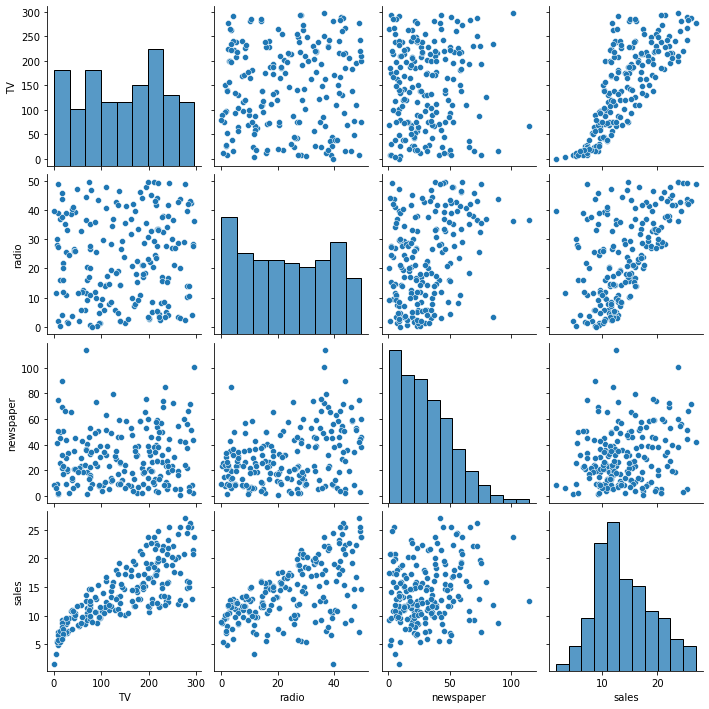

In [5]:
sns.pairplot(df)

In [6]:
#features
X = df.drop('sales',axis=1)

In [7]:
#labels
y = df['sales']

In [8]:
#train test split
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
len(X_test)

60

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
#help(LinearRegression)

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
test_predictions = model.predict(X_test) #y_test

In [16]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

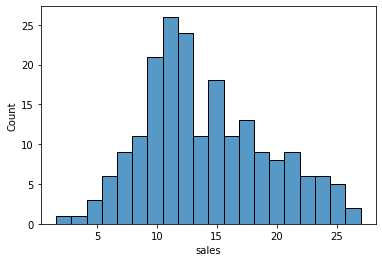

In [19]:
sns.histplot(data=df,x='sales',bins=20)

In [20]:
mean_absolute_error(y_test,test_predictions)

1.2137457736144808

In [21]:
# RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))
#IF RMSE is way off, then it is problem with data points being off by large amount

1.5161519375993877

In [22]:
test_residuals = y_test - test_predictions

In [23]:
# test_residuals

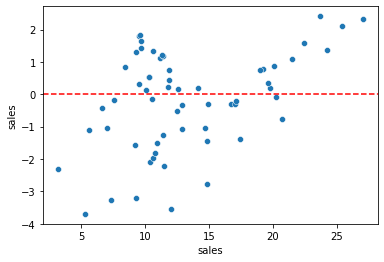

In [24]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')

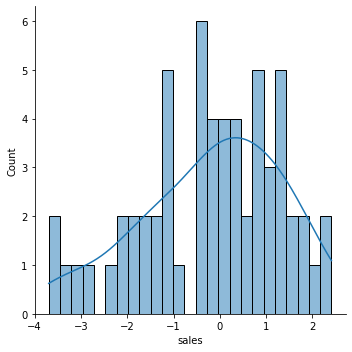

In [25]:
sns.displot(test_residuals,bins=25,kde=True)

In [26]:
import scipy as sp

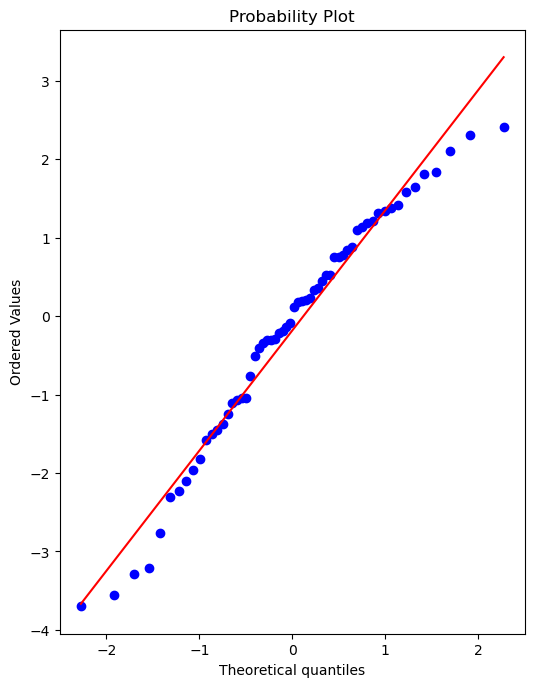

In [27]:
#is it normally distribuated? red line is perfectly normal
#create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
#probplot returns the raw values if needed
#we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [28]:
final_model = LinearRegression()

In [29]:
#we decided this was good so we apply it to entire data set
final_model.fit(X,y)

LinearRegression()

In [30]:
final_model.coef_ #for each feature TV, radio, newspaper

array([ 0.04576465,  0.18853002, -0.00103749])

In [31]:
y_hat = final_model.predict(X)

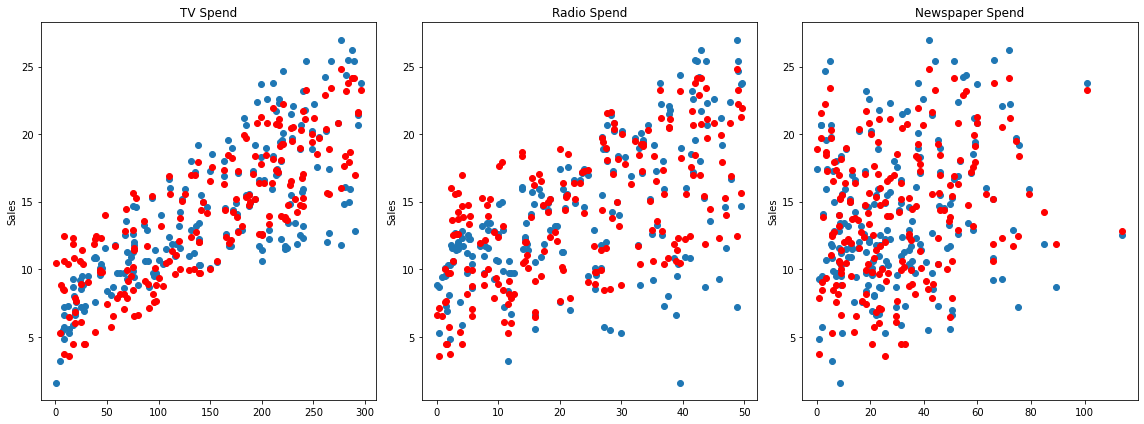

In [32]:
fig,axes = plt.subplots(1,3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel('Sales')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title('Newspaper Spend');
axes[2].set_ylabel('Sales')
plt.tight_layout();

In [33]:
#deploying the model to new data and the real world
from joblib import dump,load

In [34]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [35]:
loaded_model = load('final_sales_model.joblib')

In [36]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [37]:
#now predict for a new advertising campaign

In [38]:
X.shape

(200, 3)

In [39]:
#spend 149 TV, 22 Radio, 12 Newspaper
#how many sales can we get from this?
campaign = [[149,22,12]]

In [40]:
loaded_model.predict(campaign)

C:\Users\david\anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13.893032])

In [43]:
df = pd.read_csv("Advertising.csv")

In [44]:
X = df.drop('sales',axis=1)

In [45]:
y = df['sales']

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [48]:
#we dont need to split test/train yet because this is only features
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [53]:
poly_features = polynomial_converter.transform(X)

In [54]:
poly_features.shape

(200, 9)

In [52]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [55]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
train_test_split = X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
model = LinearRegression()

In [86]:
model.fit(X_train,y_train)

LinearRegression()

In [87]:
test_predictions = model.predict(X_test)

In [88]:
#model.coef_

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [90]:
MAE = mean_absolute_error(y_test,test_predictions)

In [91]:
MSE = mean_squared_error(y_test,test_predictions)

In [92]:
RMSE = np.sqrt(MSE)

In [93]:
MAE

1.2137457736144805

In [94]:
RMSE

1.5161519375993875

In [95]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [96]:
poly_features[0]

array([230.1,  37.8,  69.2])

In [97]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [109]:
# create different order of poly
#split poly feat train/test
#fit on train
#store/save the rmse for BOTH the train AND test
#PLOT the results (error vs poly order)
from sklearn.model_selection import train_test_split

In [112]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


In [113]:
train_rmse_errors

[1.7345941243293763,
 0.587957408529223,
 0.4339344356902067,
 0.35170836883993584,
 0.2509342962728227,
 0.1994556133865361,
 5.418481285535737,
 0.1508621033579802,
 0.17175170448632276]

In [114]:
test_rmse_errors

[1.5161519375993875,
 0.6646431757268965,
 0.5803286825240505,
 0.5077742641892913,
 2.575808121294812,
 4.263812349320766,
 1383.4052620420694,
 3733.4225752445113,
 95489.26452707677]

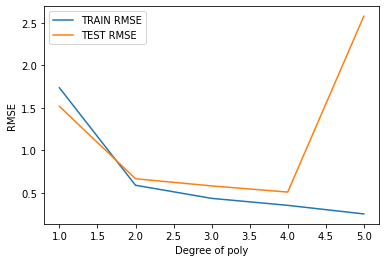

In [118]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of poly')
plt.legend()

In [119]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [120]:
final_model = LinearRegression()

In [121]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [123]:
from joblib import dump,load

In [124]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [125]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [126]:
loaded_converter = load('final_converter.joblib')

In [127]:
loaded_model = load('final_poly_model.joblib')

In [128]:
campaign = [[149,22,12]]

In [131]:
transformed_data = loaded_converter.fit_transform(campaign)

In [132]:
loaded_model.predict(transformed_data)

array([14.64501014])